### We have implemented Clustering using KPrptotypes (as the dataset has many categorical variables).Clustering will help us in creating accurate models for each cluster type .

In [3]:
!pip install kmodes


In [7]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # import library for making plots
import seaborn as sns
from kmodes.kprototypes import KPrototypes

## Load and review data

In [16]:
df=pd.read_csv("train.csv")

In [18]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Data Preprocessing starts

In [19]:
#Remove following columns
df=df.drop(labels=['User_ID','Product_ID'], axis=1)


In [20]:
######Null Check
null_counts=df.isna().sum()
print(null_counts)
#Product Category 2 and 3 are having Null values ,but these columns are not useful in predcing the purchase amount. 
#So we will be dropping certain columns after the exploratory analysis which we carried out previously.

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


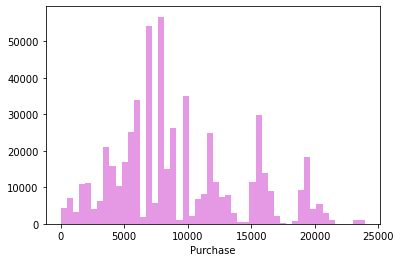

In [21]:
sns.distplot(df['Purchase'],kde=False,color='m')
plt.show()

In [22]:
#Handle Outliers-as of now removing outliers
import numpy as np

# IQR
Q1 = np.percentile(df['Purchase'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Purchase'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ",df.shape)
 
# Upper bound
upper = np.where(df['Purchase'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Purchase'] <= (Q1-1.5*IQR))
 
#''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

Old Shape:  (550068, 10)
New Shape:  (547391, 10)


In [24]:
df.drop(['Product_Category_2', 'Product_Category_3'],axis=1,inplace=True)
df.shape

(547391, 8)

In [25]:
#Divide into labels and features
Y=df['Purchase']
X=df.drop(['Purchase'],axis=1)

In [27]:
#Assigning numerical values to Age Categories
dic_to_replace = {"Age": {"0-17": 1, "18-25": 2,"26-35": 3,"36-45": 4,"46-50":5,"51-55":6,"55+": 7},
                  "Stay_In_Current_City_Years":{"4+":5}}
X.replace(dic_to_replace, inplace=True)

In [28]:
X['Stay_In_Current_City_Years']=X['Stay_In_Current_City_Years'].astype('int64')
#only run below for clustering
X['Marital_Status']=X['Marital_Status'].astype('object')
X['Occupation']=X['Occupation'].astype('object')
X['Product_Category_1']=X['Product_Category_1'].astype('object')

In [ ]:
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
1,F,1,10,A,2,0,1,6
3,F,1,10,A,2,0,12,14
5,M,3,15,A,3,0,1,2
6,M,5,7,B,2,1,1,8
7,M,5,7,B,2,1,1,15


### Data Preprocessing ends

### Divide the complete dataset into different clusters and store it in respective files

In [29]:
#Run clusters . Going for 3 clusters 
kproto = KPrototypes(n_clusters=3, verbose=2,max_iter=2)
clusters_label = kproto.fit_predict(X, categorical=[0, 2, 3,5, 6])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/2, moves: 157018, ncost: 2201670.531087731
Run: 1, iteration: 2/2, moves: 68375, ncost: 2122116.647913896
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/2, moves: 142066, ncost: 2472985.6046380084
Run: 2, iteration: 2/2, moves: 127977, ncost: 2195614.5358459153
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/2, moves: 162039, ncost: 2266944.0369136925
Run: 3, iteration: 2/2, moves: 108033, ncost: 2100013.9445267073
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/2, moves: 60864, ncost: 2377760.9627037053
Run: 4, iteration: 2/2, moves: 84757, ncost: 2147421.4618418925
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/2, moves: 116960, ncost: 2106388.226628589
Run: 5, iteration: 2/

In [30]:
X['clusterNo']=clusters_label
X['Purchase']=Y
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,clusterNo,Purchase
0,F,1,10,A,2,0,3,1,8370
1,F,1,10,A,2,0,1,1,15200
2,F,1,10,A,2,0,12,1,1422
3,F,1,10,A,2,0,12,1,1057
4,M,7,16,C,5,0,8,2,7969


#### Save the model in sav format ,It will be used while  doing clustering for test dataset

In [31]:
#Save this model as it will be useful in test dataset
with open( 'clusteringModel.sav', 'wb') as f:
    pickle.dump(kproto,f)

#### Store each cluster dataset into respective csv files

In [32]:
cluster0=X[X['clusterNo']==0]
print(cluster0.shape)
cluster0.to_csv("Cluster_0.csv")

(161107, 9)


In [33]:
cluster1=X[X['clusterNo']==1]
print(cluster1.shape)
cluster1.to_csv("Cluster_1.csv")

(291150, 9)


In [34]:
cluster2=X[X['clusterNo']==2]
print(cluster2.shape)
cluster2.to_csv("Cluster_2.csv")

(95134, 9)
